In [14]:
from math import radians, cos, sin, asin, sqrt
import copy
import pandas as pd
import time
from datetime import timedelta
import sys
import platform
import matplotlib.pyplot as plt

These libraries are not in the std library. Must be added to conda enviornment.

In [15]:
import psutil

In [16]:
def distance(x, y): #euclidean distance 
    x1,x2,y1,y2 = float(x[0]),float(x[1]),float(y[0]),float(y[1])
    return sqrt((y2 - x2)**2 + (y1 - x1)**2)


def haversine_distance(x, y): #Earth's curvature
      
    lat1,lon1,lat2,lon2 = float(x[0]),float(x[1]),float(y[0]),float(y[1])
    
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    m = 3956 # Radius of earth in miles. Use 3956 for miles
    return c * m


def oneSwap(S):
        origCost = cost(S)
        t = .99
        for ind, y in enumerate(C):
            for ind2, x in enumerate(S):
                if x == ind:
                    continue
                S[ind2] = ind
                if(cost(S)<t*origCost):
                    return True, S
                else:
                    S[ind2] = x
        return False,S

    
def cost(S):
    cost = 0
    for ind, y in enumerate(C): #find the closest s in S for each c in C
        minD = float('inf')
        for x in S: #distance = 0 
            if x == ind:
                minD = 0
                break
            if G[ind][x] < minD:
                minD = G[ind][x]
        cost+= minD
    return cost


def fetchPlatform():
    print("="*40, "System Information", "="*40)
    uname = platform.uname()
    print(f"System: {uname.system}")
    print(f"Node Name: {uname.node}")
    print(f"Release: {uname.release}")
    print(f"Version: {uname.version}")
    print(f"Machine: {uname.machine}")
    print(f"Processor: {uname.processor}")

    
def get_size(bytes, suffix="B"):
    """
    Scale bytes to its proper format
    e.g:
        1253656 => '1.20MB'
        1253656678 => '1.17GB'
    """
    factor = 1024
    for unit in ["", "K", "M", "G", "T", "P"]:
        if bytes < factor:
            return f"{bytes:.2f}{unit}{suffix}"
        bytes /= factor
        
        
def fetchOptCenters():
    optCenters = []
    df = pd.read_csv("500_us_city_coords.txt",delimiter="\t",header=None)
    kmedoids = KMedoids(n_clusters=20,random_state=0,metric='euclidean',max_iter=1).fit(df)
    centers = list(kmedoids.cluster_centers_)
    for i, s in df.iterrows():
        for x in centers:
            if(x[0] == s[0] and x[1] == s[1]):
                optCenters.append(i)
    return optCenters

In [17]:
C = []
S = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
k = 20
f = open("500_us_city_coords.txt")
G = []
ts = []
objs = []
iterations = 0
for line in f:
    C.append(line.split())
#Adj Matrix, saves CK calc per oneSwap(S)
for x in C:
    E = {}
    for ind,y in enumerate(C):
        if x == ind: 
            continue #(lat and log should be eq if entries are eq)
        E[ind] = distance(x,y)
    G.append(E)
    
start_time = time.monotonic()
start_mem = psutil.virtual_memory().used
#get initial values
ts.append(iterations)
objs.append(cost(S))
while(1):
    iterations+= 1
    ret, S = oneSwap(S)
    objs.append(cost(S))
    ts.append(iterations)
    if(ret == False):
        break

times = [str(x) for x in ts]
times_stripped = [x.split(".",1)[0] for x in times]
I = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
print("inital cost:",cost(I))
end_mem = psutil.virtual_memory().used
end_time = time.monotonic()
memory_used = end_mem- start_mem
finalCost = cost(S)
f=finalCost/k
time_elapsed = timedelta(seconds=end_time - start_time) 
print("iterations: ", iterations)
print("S found from oneSwap is: ",S)
print("The Cost of S is ", finalCost)
print("Proceed with opening cost f of ", f)
print("Time Elapsed: ", time_elapsed)
print("Total cores:", psutil.cpu_count(logical=True))
# CPU frequencies
cpufreq = psutil.cpu_freq()
print(f"Frequency: {cpufreq.max:.2f}Mhz")
fetchPlatform()
#84283392

inital cost: 1031.5391394011203
iterations:  16
S found from oneSwap is:  [37, 33, 2, 130, 4, 43, 6, 7, 8, 9, 10, 48, 144, 13, 340, 15, 164, 17, 20, 19]
The Cost of S is  780.7005701783872
Proceed with opening cost f of  39.03502850891936
Time Elapsed:  0:00:34.039253
Total cores: 8
Frequency: 2700.00Mhz
======================================== System Information ========================================
System: Darwin
Node Name: Nigels-MacBook-Pro.local
Release: 18.7.0
Version: Darwin Kernel Version 18.7.0: Tue Aug 20 16:57:14 PDT 2019; root:xnu-4903.271.2~2/RELEASE_X86_64
Machine: x86_64
Processor: i386


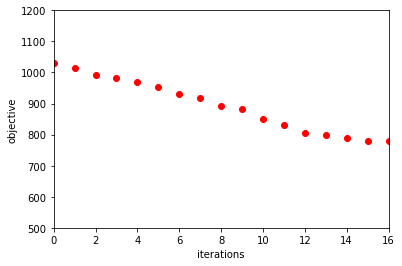

In [18]:

#plot t vs objective value
plt.plot(ts, objs, 'ro')
plt.axis([0, 16, 500, 1200])
plt.xlabel("iterations")
plt.ylabel("objective")
plt.show()

In [ ]:
#search for optimal k
#TODO add in plot for Lat & Long
e = 10
minCost = float('inf')
minK = 0
savedS = []
ks = []
objs = []
k = 1

#try every k within a factor of 2 
while k < 100:
    S = []
    for n in range(k):
        S.append(n)
          
    while(1):
        ret, S = oneSwap(S)
        if(ret == False):
            break
          
    newCost = cost(S)
    newCost = newCost + f*k
    ks.append(k)
    objs.append(newCost)
          
    print("Cost for k =" + str(k))
    print(newCost)
          
    if newCost< minCost:
        minCost = newCost
        minK = k
        savedS = copy.deepcopy(S)
        
    k*=2
          
print("Optimal kmeans clustering for the obj is k = ",minK)
print("S of k is: ",savedS)

Cost for k =1
8241.612971816154
Cost for k =2
4164.94581041575
Cost for k =4
2896.6240114525226
Cost for k =8
1947.5867783647943
Cost for k =16
1592.8480377794551
Cost for k =32
1818.8068648481706


In [ ]:
#plot k vs objective value
plt.plot(ks[1:], objs[1:], 'ro')
plt.axis([0, 64, 0, 5000])
plt.xlabel("k")
plt.ylabel("objective")
plt.show()